# Flight Delay Characteristics for US Flights in 2005

## Investigation Overview
This investigation was focused on the characteristics of flight delays in 2005. The main focus was to determine peak periods of delays throughout the year. 

## Dataset Overview
The data constisted of approximately 7 million US flights. Arrival and departure delays as well as the delay cause were used from this dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final outpu
import warnings
warnings.simplefilter("ignore")

In [2]:
# read in data to be used as a midway point. 
df_2005_c = pd.read_csv('input_cleaned/2005_cleaned.csv')
df_2005_c['CarrierDelayCat'] = df_2005_c['CarrierDelayCat'].astype('category')
df_2005_c['WeatherDelayCat'] = df_2005_c['WeatherDelayCat'].astype('category')
df_2005_c['DepDelayCat'] = df_2005_c['DepDelayCat'].astype('category')
df_2005_c['ArrDelayCat'] = df_2005_c['ArrDelayCat'].astype('category')
df_2005_c['NASDelayCat'] = df_2005_c['NASDelayCat'].astype('category')
df_2005_c['SecurityDelayCat'] = df_2005_c['SecurityDelayCat'].astype('category')
df_2005_c['LateAircraftDelayCat'] = df_2005_c['LateAircraftDelayCat'].astype('category')

df_2005_c['DepDelay'] = df_2005_c['DepDelay'].astype('int')
df_2005_c['ArrDelay'] = df_2005_c['ArrDelay'].astype('int')

## Distribution of Total Flights
Overall flight distribution for each month. Flights range from around 534,000 at the lowest month, up to 615,000 at the highest peak. This provides a difference of approximately 80,000 flights.

In [5]:
df_2005_c.groupby(['Month'])['Month'].count()

Month
1     568031
2     534959
3     606489
4     586179
5     608046
6     597856
7     612107
8     615643
9     561905
10    581513
11    559625
12    560485
Name: Month, dtype: int64

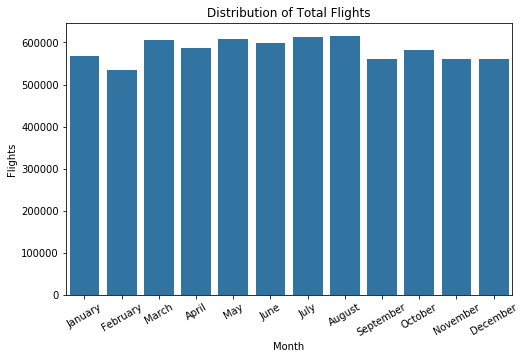

In [37]:
base_color = sb.color_palette()[0]          
fig, ax = plt.subplots(figsize=(8,5))
p = sb.countplot(data=df_2005_c, x='Month',  color = base_color)
p.set(xticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xticks(rotation=30)
plt.title('Distribution of Total Flights')
plt.xlabel('Month')
plt.ylabel('Flights');

## Flight Departure Delay Status

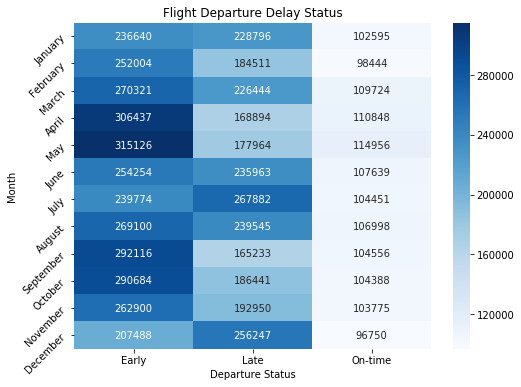

In [53]:
# heatmap version of the barchart above
plt.figure(figsize = [8,6])

dep_counts = df_2005_c.groupby(['Month','DepDelayCat']).size()
dep_counts = dep_counts.reset_index(name = 'count')
dep_counts = dep_counts.pivot(index = 'Month', columns = 'DepDelayCat', values = 'count')
p = sb.heatmap(dep_counts, annot=True, fmt='d', cmap='Blues')

p.set(yticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.yticks(rotation=45)
plt.title('Flight Departure Delay Status')
plt.xlabel('Departure Status')
plt.ylabel('Month');


## Flight Arrival Delay Status

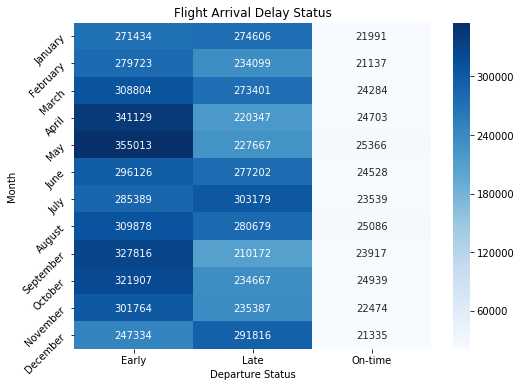

In [54]:
# heatmap version of the barchart above
plt.figure(figsize = [8,6])

arr_counts = df_2005_c.groupby(['Month','ArrDelayCat']).size()
arr_counts = arr_counts.reset_index(name = 'count')
arr_counts = arr_counts.pivot(index = 'Month', columns = 'ArrDelayCat', values = 'count')
p = sb.heatmap(arr_counts, annot=True, fmt='d', cmap='Blues');

p.set(yticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.yticks(rotation=45)
plt.title('Flight Arrival Delay Status')
plt.xlabel('Departure Status')
plt.ylabel('Month');

## Flight Delay Counts by Week and Month

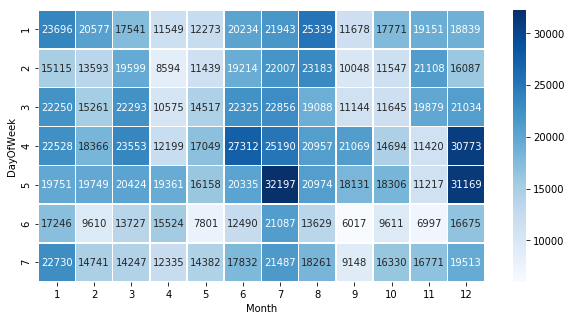

In [21]:
# overall count of delays for the year
plt.figure(figsize = [10,5])
sumcounts = df_2005_c.groupby(['Month', 'DayOfWeek']).sum()['OverallDelayCat']
sumcounts = sumcounts.reset_index(name = 'count')
sumcounts = sumcounts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(sumcounts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');

p.set(xticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xticks(rotation=30)
plt.title('Flight Depature Status')
plt.xlabel('Month')
plt.ylabel('Total');

In [23]:
# overall average for departure delay
df_2005_c.query('DepDelay > 0')['DepDelay'].mean()

29.649188223812367

Here we can see the average departure delay in minutes. Delays still generally follow the overall delay count pattern. We have a peak average of 57 minutes on the high end to 31 minutes on the low end while the overall average is 30 minutes.

In [25]:
# overall average for arrival delay
df_2005_c.query('ArrDelay > 0')['ArrDelay'].mean()

28.321059655486934

Here we can see the average arrival delay in minutes. Delays still follow the pattern. We have a peak average of 70 minutes on the high end to 41 minutes on the low end while the overall average is 28 minutes. Overall delay minutes increased from departures. Let's see what the average delays are for the specific categories.

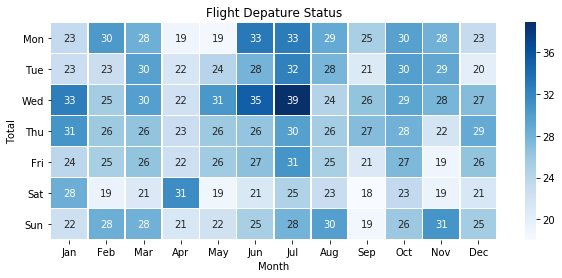

In [70]:
plt.figure(figsize = [10,4])
counts = df_2005_c.query('NASDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['NASDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
p = sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xticks(rotation=0)
p.set(yticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.yticks(rotation=0)
plt.title('Flight Depature Status')
plt.xlabel('Month')
plt.ylabel('Total');

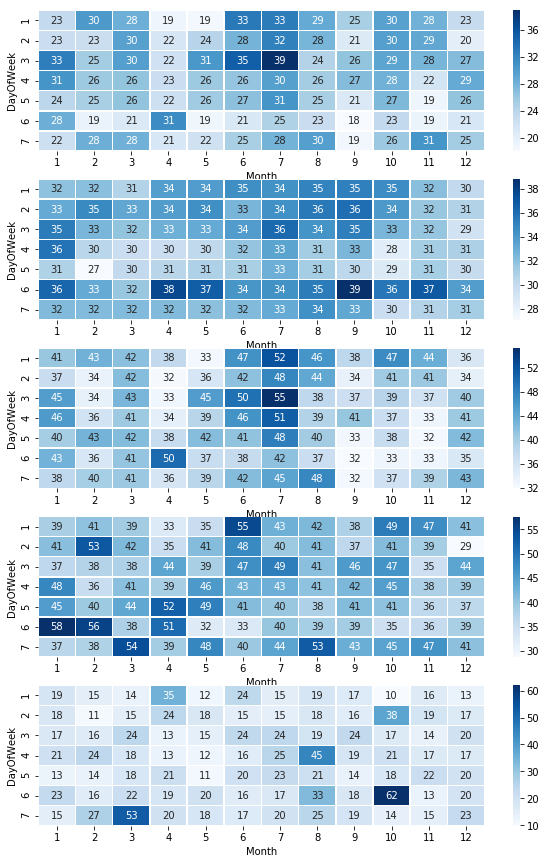

In [26]:


plt.subplot(5, 1, 2)
counts = df_2005_c.query('CarrierDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['CarrierDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');
p.set(xticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xticks(rotation=30)
plt.title('Flight Depature Status')
plt.xlabel('Month')
plt.ylabel('Total');

plt.subplot(5, 1, 3)
counts = df_2005_c.query('LateAircraftDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['LateAircraftDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');
p.set(xticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xticks(rotation=30)
plt.title('Flight Depature Status')
plt.xlabel('Month')
plt.ylabel('Total');

plt.subplot(5, 1, 4)
counts = df_2005_c.query('WeatherDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['WeatherDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');
p.set(xticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xticks(rotation=30)
plt.title('Flight Depature Status')
plt.xlabel('Month')
plt.ylabel('Total');

plt.subplot(5, 1, 5)
counts = df_2005_c.query('SecurityDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['SecurityDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');
p.set(xticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xticks(rotation=30)
plt.title('Flight Depature Status')
plt.xlabel('Month')
plt.ylabel('Total');

In [27]:
# mean delays for the specifc delay type
print('NASDelay  ' + str(df_2005_c.query('NASDelayCat == 1')['NASDelay'].mean()))
print('CarrierDelay  ' + str(df_2005_c.query('CarrierDelayCat == 1')['CarrierDelay'].mean()))
print('LateAircraftDelay  ' + str(df_2005_c.query('LateAircraftDelayCat == 1')['LateAircraftDelay'].mean()))
print('WeatherDelay  ' + str(df_2005_c.query('WeatherDelayCat == 1')['WeatherDelay'].mean()))
print('SecurityDelay  ' + str(df_2005_c.query('SecurityDelayCat == 1')['SecurityDelay'].mean()))

NASDelay  26.80078130224471
CarrierDelay  32.55502668397519
LateAircraftDelay  41.4578900821626
WeatherDelay  42.318651919416816
SecurityDelay  21.28338614757809
